# Morfologia matemática

As transformações morfológicas são algumas operações simples baseadas na forma da imagem. Normalmente são executadas em imagens binárias. Ele precisa de duas entradas, uma é a nossa imagem original, a segunda é chamada de elemento estruturante ou núcleo que decide a natureza da operação. 

Dois operadores morfológicos básicos são Erosão e Dilatação. 

Em seguida, suas formas variantes, como Abertura, Fechamento, Gradiente, etc., também entram em jogo. Vamos vê-los um por um com a ajuda da seguinte imagem:

### 1. Erosão

A ideia básica da erosão é apenas como a erosão do solo, ela erode os limites do objeto em primeiro plano (sempre tente manter o primeiro plano em branco). Então o que ele faz? 

O kernel desliza pela imagem (como na convolução 2D). Um pixel na imagem original (seja 1 ou 0) será considerado 1 apenas se todos os pixels sob o kernel forem 1, caso contrário, ele será erodido (tornado a zero).

Então, o que acontece é que todos os pixels próximos ao limite serão descartados dependendo do tamanho do kernel. Assim, a espessura ou o tamanho do objeto em primeiro plano diminui ou simplesmente a região branca diminui na imagem. É útil para remover pequenos ruídos brancos (como vimos no capítulo sobre espaço de cores), separar dois objetos conectados etc.

Aqui, como exemplo, eu usaria um kernel 5x5 cheio de uns. Vejamos como funciona:

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

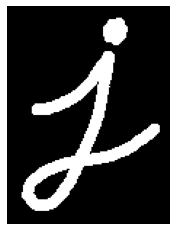

In [32]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

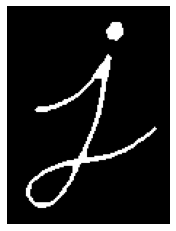

In [33]:
plt.axis('off')
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

### 2. Dilatação

É exatamente o oposto da erosão. Aqui, um elemento de pixel é '1' se pelo menos um pixel sob o kernel for '1'. 

Assim, aumenta a região branca na imagem ou aumenta o tamanho do objeto em primeiro plano. Normalmente, em casos como remoção de ruído, a erosão é seguida de dilatação. 

Porque a erosão remove os ruídos brancos, mas também encolhe nosso objeto. Então nós dilatamos. Como o ruído acabou, eles não voltarão, mas nossa área de objeto aumenta. Também é útil para unir partes quebradas de um objeto.

In [14]:
dilation = cv2.dilate(img,kernel,iterations = 1)

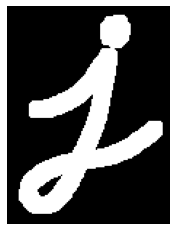

In [34]:
plt.axis('off')
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

### 3. Abertura

Abertura é apenas outro nome de erosão seguida de dilatação. É útil na remoção de ruído, como explicamos acima. Aqui usamos a função, cv.morphologyEx()

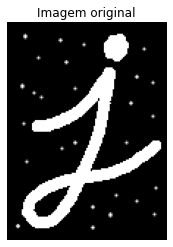

In [35]:
img_a = cv2.imread('j_ruido.png', cv.IMREAD_GRAYSCALE)
plt.title("Imagem original")
plt.axis('off')
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))

opening = cv2.morphologyEx(img_a, cv2.MORPH_OPEN, kernel)

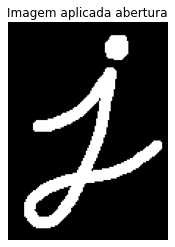

In [36]:
plt.title("Imagem aplicada abertura")
plt.axis('off')
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))

### 4. Fechamento

Fechamento é inverso de Abertura, Dilatação seguida de Erosão. É útil para fechar pequenos orifícios dentro dos objetos em primeiro plano ou pequenos pontos pretos no objeto.

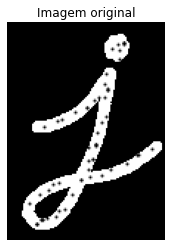

In [37]:
img_a = cv2.imread('j_orificios.png', cv.IMREAD_GRAYSCALE)
plt.title("Imagem original")
plt.axis('off')
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))

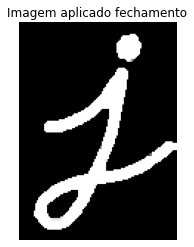

In [38]:
closing = cv.morphologyEx(img_a, cv.MORPH_CLOSE, kernel)
plt.title("Imagem aplicado fechamento")
plt.axis('off')
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))

### 5. Gradiente morfológico

É a diferença entre dilatação e erosão de uma imagem.

O resultado será parecido com o contorno do objeto.

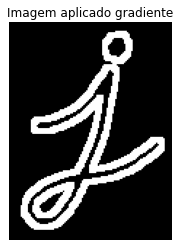

In [41]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.title("Imagem aplicado gradiente")
plt.axis('off')
plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

### 6. Top hat

É a diferença entre a imagem de entrada e a abertura da imagem. O exemplo abaixo é feito para um kernel 9x9.

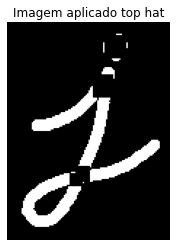

In [43]:
kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.title("Imagem aplicado top hat")
plt.axis('off')
plt.imshow(cv2.cvtColor(tophat, cv2.COLOR_BGR2RGB))

### 7. Black hat

É a diferença entre o fechamento da imagem de entrada e a imagem de entrada.

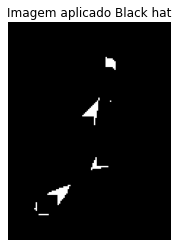

In [44]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.title("Imagem aplicado Black hat")
plt.axis('off')
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB))

### Elemento estruturante

Criamos manualmente elementos de estruturação nos exemplos anteriores com a ajuda do Numpy. 
É de formato retangular. Mas, em alguns casos, você pode precisar de outros elementos. Portanto, para esse propósito, o OpenCV possui uma função, cv.getStructuringElement(). Você apenas passa a forma e o tamanho do kernel, obtém o kernel desejado

In [46]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [47]:
# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [48]:
# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Referências

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html 

#### Material complementar
https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm